In [ ]:
!pip3 install matplotlib
!pip3 install pandas
!pip3 install numpy
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,672 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving subway_time.csv to subway_time.csv


In [ ]:
import pandas as pd
df = pd.read_csv('subway_time.csv',  encoding='euc-kr')
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as
df


,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,1호선,서울역,658,24,8560,9158,14541,62765,43682,121498,...,14443,3203,3771,3,263,0,0,0,0,NaN
2,1호선,시청,94,2,2321,5550,4123,26788,7965,76757,...,4110,661,1172,3,40,1,0,0,0,NaN
3,1호선,종각,140,4,3754,5916,4432,31983,6987,116830,...,4706,2029,1395,1,2,0,0,0,0,NaN
4,1호선,종로3가,213,9,3993,2632,3760,13113,6192,28333,...,5417,2108,2426,1,38,0,1,0,0,NaN
5,1호선,종로5가,38,2,1997,3764,3361,17380,5936,43604,...,3795,366,1319,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,신림선,당곡,0,0,1988,201,4606,1108,14206,3961,...,4252,245,1581,0,0,0,0,0,0,NaN
618,신림선,신림,0,0,1000,274,1567,814,4593,1530,...,2120,344,823,2,8,0,0,0,0,NaN
619,신림선,서원,0,0,2267,289,4501,829,14488,1261,...,4631,105,1635,2,2,0,0,0,0,NaN
620,신림선,서울대벤처타운,14,0,6293,494,10905,4055,33214,6803,...,12312,620,5886,1,193,0,0,0,0,NaN


호선을 입력하세요 (예: 1호선): 1호선


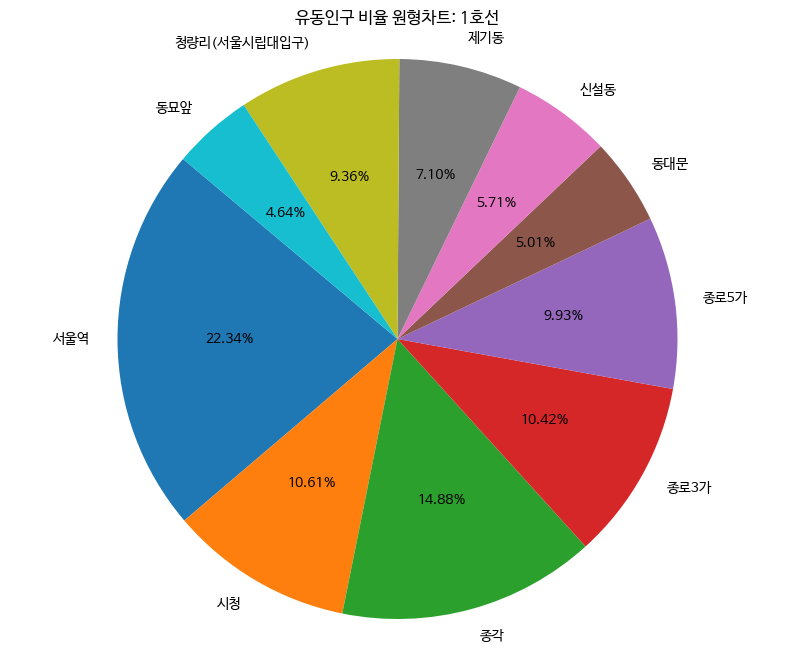

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('subway_time.csv',  encoding='euc-kr')

df_cleaned = df.drop(0)

df_cleaned.columns = ['호선명', '지하철역'] + df.columns[2:].tolist()

# df_cleaned = df_cleaned.drop(df_cleaned.index[0]).reset_index(drop=True)


def create_pie_chart_for_line(line_name):

    line_data = df_cleaned[df_cleaned['호선명'] == line_name]

    station_totals = line_data.iloc[:, 2:].apply(pd.to_numeric, errors='coerce').sum(axis=1)

    stations = line_data['지하철역']

    plt.figure(figsize=(10, 8))
    plt.pie(station_totals, labels=stations, autopct='%1.2f%%', startangle=140)
    plt.title(f'유동인구 비율 원형차트: {line_name}')
    plt.axis('equal')
    plt.show()


line_name = input("호선을 입력하세요 (예: 1호선): ")

create_pie_chart_for_line(line_name)


지하철역을 입력하세요: 서울역
서울역 역의 호선 목록: 1호선, 4호선, 경부선, 경의선, 공항철도 1호선
시각화할 호선을 입력하세요: 1호선


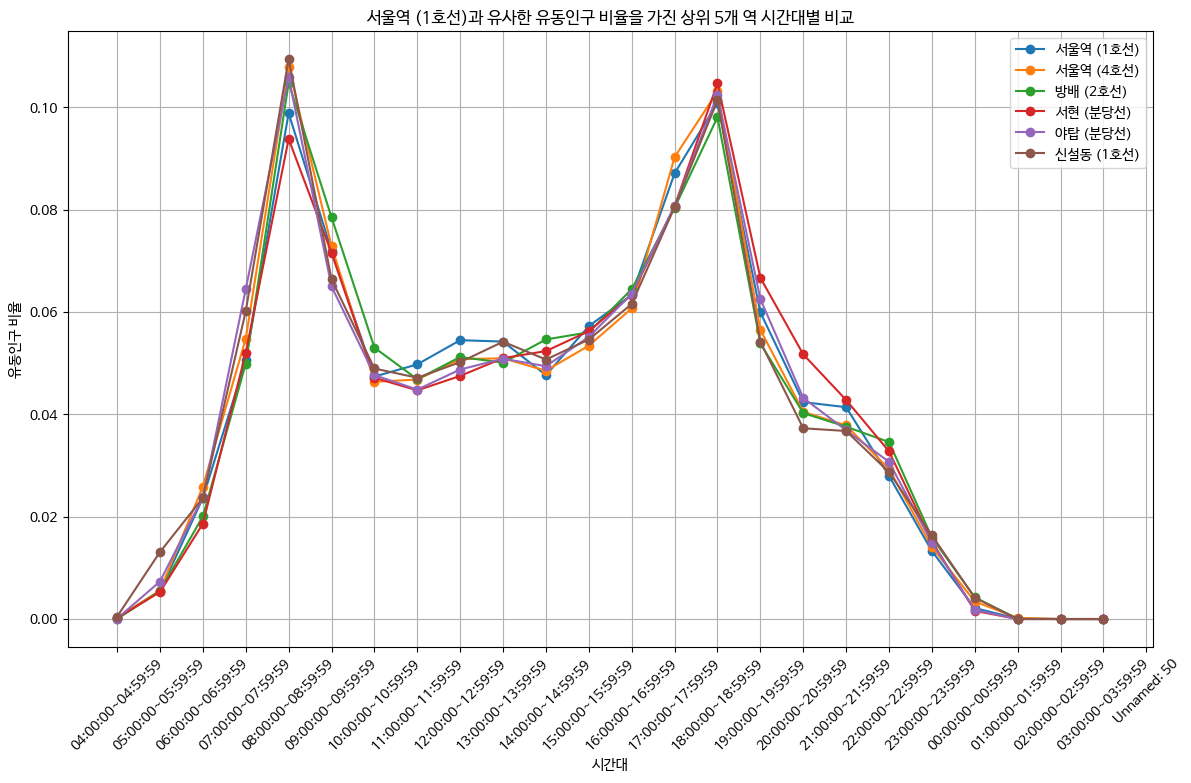

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
df = pd.read_csv('subway_time.csv', encoding='euc-kr')
df_cleaned = df.drop(0)

# 열 이름을 올바르게 설정
df_cleaned.columns = ['호선명', '지하철역'] + df.columns[2:].tolist()

df_cleaned.iloc[:, 2:] = df_cleaned.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# 승차와 하차 데이터를 각각 분리하여 유동인구 계산
boarding_columns = df_cleaned.columns[2::2]  # 승차 열
alighting_columns = df_cleaned.columns[3::2]  # 하차 열

# 각 역의 시간대별 유동인구 계산 (승차 + 하차)
for board_col, alight_col in zip(boarding_columns, alighting_columns):
    df_cleaned[board_col] += df_cleaned[alight_col]

# 필요 없는 하차 열 삭제
df_cleaned = df_cleaned.drop(columns=alighting_columns)

# 유동인구 비율 계산
df_cleaned['유동인구'] = df_cleaned[boarding_columns].sum(axis=1)
df_cleaned[boarding_columns] = df_cleaned[boarding_columns].div(df_cleaned['유동인구'], axis=0)

# 특정 역과 유동인구 비율이 비슷한 상위 5개 역을 찾고 시각화하는 함수
def find_similar_stations(target_station, target_line):
    # 대상 역과 호선으로 필터링
    target_data = df_cleaned[(df_cleaned['지하철역'] == target_station) & (df_cleaned['호선명'] == target_line)]

    # 대상 역의 유동인구 비율 데이터 추출
    target_ratios = target_data[boarding_columns].values.flatten()

    # 모든 역의 유동인구 비율과 대상 역의 유동인구 비율의 제곱 차이 계산
    df_cleaned['비율차이'] = df_cleaned[boarding_columns].sub(target_ratios).pow(2).sum(axis=1)

    # 차이가 적은 상위 6개 역 선택 (자신 포함)
    similar_stations = df_cleaned.sort_values(by='비율차이').head(6)

    # 자신을 제외한 상위 5개 역 선택
    similar_stations = similar_stations.head(6)

    # 시각화
    plt.figure(figsize=(14, 8))

    # 비슷한 역 데이터 추가
    for _, row in similar_stations.iterrows():
        station_ratios = row[boarding_columns].values.flatten()
        plt.plot(boarding_columns, station_ratios, label=f'{row["지하철역"]} ({row["호선명"]})', marker='o')

    plt.xlabel('시간대')
    plt.ylabel('유동인구 비율')
    plt.title(f'{target_station} ({target_line})과 유사한 유동인구 비율을 가진 상위 5개 역 시간대별 비교')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# 사용자로부터 지하철역 이름을 입력받기
target_station = input("지하철역을 입력하세요: ")

# 해당 역의 호선 목록 출력
lines = df_cleaned[df_cleaned['지하철역'] == target_station]['호선명'].unique()
print(f"{target_station} 역의 호선 목록: {', '.join(lines)}")

# 사용자로부터 시각화할 호선명을 입력받기
target_line = input("시각화할 호선을 입력하세요: ")

# 입력받은 지하철역과 유사한 유동인구를 가진 상위 5개 역 시각화
find_similar_stations(target_station, target_line)

In [ ]:
import pandas as pd

# CSV 파일 로드
subway_data_raw = pd.read_csv('subway_time.csv', encoding='euc-kr')

# 중복된 헤더가 있는 첫 번째 행을 삭제
subway_data_cleaned = subway_data_raw.drop(0).reset_index(drop=True)

# 적절한 열 이름 지정
column_names = ["호선명", "지하철역",
                "04:00~05:00_승차", "04:00~05:00_하차",
                "05:00~06:00_승차", "05:00~06:00_하차",
                "06:00~07:00_승차", "06:00~07:00_하차",
                "07:00~08:00_승차", "07:00~08:00_하차",
                "08:00~09:00_승차", "08:00~09:00_하차",
                "09:00~10:00_승차", "09:00~10:00_하차",
                "10:00~11:00_승차", "10:00~11:00_하차",
                "11:00~12:00_승차", "11:00~12:00_하차",
                "12:00~13:00_승차", "12:00~13:00_하차",
                "13:00~14:00_승차", "13:00~14:00_하차",
                "14:00~15:00_승차", "14:00~15:00_하차",
                "15:00~16:00_승차", "15:00~16:00_하차",
                "16:00~17:00_승차", "16:00~17:00_하차",
                "17:00~18:00_승차", "17:00~18:00_하차",
                "18:00~19:00_승차", "18:00~19:00_하차",
                "19:00~20:00_승차", "19:00~20:00_하차",
                "20:00~21:00_승차", "20:00~21:00_하차",
                "21:00~22:00_승차", "21:00~22:00_하차",
                "22:00~23:00_승차", "22:00~23:00_하차",
                "23:00~24:00_승차", "23:00~24:00_하차",
                "00:00~01:00_승차", "00:00~01:00_하차",
                "01:00~02:00_승차", "01:00~02:00_하차",
                "02:00~03:00_승차", "02:00~03:00_하차",
                "03:00~04:00_승차", "03:00~04:00_하차",
                'Unnamed: 50']
subway_data_cleaned.columns = column_names

# 'Unnamed: 50' 열 삭제 (유용한 데이터가 없으므로)
subway_data_cleaned = subway_data_cleaned.drop(columns=['Unnamed: 50'])

# 모든 숫자 열을 정수형으로 변환
numeric_columns = subway_data_cleaned.columns[2:]
subway_data_cleaned[numeric_columns] = subway_data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# '지하철역'별로 그룹화하고 역별로 모든 숫자 값을 합산 (여러 호선을 가진 역 처리)
grouped_data = subway_data_cleaned.groupby('지하철역')[numeric_columns].sum().reset_index()

# 모든 역에 대한 총 승차 및 하차 계산
grouped_data['총승차'] = grouped_data[[col for col in numeric_columns if '승차' in col]].sum(axis=1)
grouped_data['총하차'] = grouped_data[[col for col in numeric_columns if '하차' in col]].sum(axis=1)

# 베드타운 및 기업단지를 위한 피크 시간 정의
morning_hours = ["06:00~07:00_승차", "07:00~08:00_승차", "08:00~09:00_승차", "09:00~10:00_승차",
                 "06:00~07:00_하차", "07:00~08:00_하차", "08:00~09:00_하차", "09:00~10:00_하차"]
evening_hours = ["17:00~18:00_승차", "18:00~19:00_승차", "19:00~20:00_승차", "20:00~21:00_승차",
                 "17:00~18:00_하차", "18:00~19:00_하차", "19:00~20:00_하차", "20:00~21:00_하차"]

# 피크 시간 합계 계산
grouped_data['출근시간_승차'] = grouped_data[[col for col in morning_hours if '승차' in col]].sum(axis=1)
grouped_data['출근시간_하차'] = grouped_data[[col for col in morning_hours if '하차' in col]].sum(axis=1)
grouped_data['퇴근시간_승차'] = grouped_data[[col for col in evening_hours if '승차' in col]].sum(axis=1)
grouped_data['퇴근시간_하차'] = grouped_data[[col for col in evening_hours if '하차' in col]].sum(axis=1)

# 베드타운 및 기업단지 비율 계산
grouped_data['베드타운_비율'] = (grouped_data['출근시간_승차'] / grouped_data['총승차'] + grouped_data['퇴근시간_하차'] / grouped_data['총하차']) / 2
grouped_data['기업단지_비율'] = (grouped_data['퇴근시간_승차'] / grouped_data['총승차'] + grouped_data['출근시간_하차'] / grouped_data['총하차']) / 2


# 상위 3개 역 선택
top_bedtown = grouped_data.nlargest(3, '베드타운_비율')[['지하철역', '베드타운_비율']].reset_index(drop=True)
top_business_district = grouped_data.nlargest(3, '기업단지_비율')[['지하철역', '기업단지_비율']].reset_index(drop=True)

print(top_bedtown)
print(grouped_data['베드타운_비율'].dtype)
print(top_business_district)
print(grouped_data['기업단지_비율'].dtype)

  지하철역   베드타운_비율
0   삼동  0.518713
1   강매  0.516872
2   계양  0.514441
float64
      지하철역   기업단지_비율
0  남동인더스파크  0.640829
1  가산디지털단지  0.598023
2   공항화물청사  0.573389
float64
